## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import pylab as pl
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
degrees_that_pay = pd.read_csv('data/degrees-that-pay-back.csv')

In [3]:
degrees_that_pay.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


## Clean Up Data

Replace all strings representings salaires with floats

In [4]:
degrees_that_pay['Starting Median Salary'] = degrees_that_pay['Starting Median Salary'].str.replace(',', '')
degrees_that_pay['Starting Median Salary'] = degrees_that_pay['Starting Median Salary'].str.replace('.', '')
degrees_that_pay['Starting Median Salary'] = degrees_that_pay['Starting Median Salary'].str.replace('$', '')
degrees_that_pay['Starting Median Salary'] = degrees_that_pay['Starting Median Salary'].astype(float)

degrees_that_pay['Mid-Career Median Salary'] = degrees_that_pay['Mid-Career Median Salary'].str.replace(',', '')
degrees_that_pay['Mid-Career Median Salary'] = degrees_that_pay['Mid-Career Median Salary'].str.replace('.', '')
degrees_that_pay['Mid-Career Median Salary'] = degrees_that_pay['Mid-Career Median Salary'].str.replace('$', '')
degrees_that_pay['Mid-Career Median Salary'] = degrees_that_pay['Mid-Career Median Salary'].astype(float)

degrees_that_pay['Mid-Career 10th Percentile Salary'] = degrees_that_pay['Mid-Career 10th Percentile Salary'].str.replace(',', '')
degrees_that_pay['Mid-Career 10th Percentile Salary'] = degrees_that_pay['Mid-Career 10th Percentile Salary'].str.replace('.', '')
degrees_that_pay['Mid-Career 10th Percentile Salary'] = degrees_that_pay['Mid-Career 10th Percentile Salary'].str.replace('$', '')
degrees_that_pay['Mid-Career 10th Percentile Salary'] = degrees_that_pay['Mid-Career 10th Percentile Salary'].astype(float)

degrees_that_pay['Mid-Career 25th Percentile Salary'] = degrees_that_pay['Mid-Career 25th Percentile Salary'].str.replace(',', '')
degrees_that_pay['Mid-Career 25th Percentile Salary'] = degrees_that_pay['Mid-Career 25th Percentile Salary'].str.replace('.', '')
degrees_that_pay['Mid-Career 25th Percentile Salary'] = degrees_that_pay['Mid-Career 25th Percentile Salary'].str.replace('$', '')
degrees_that_pay['Mid-Career 25th Percentile Salary'] = degrees_that_pay['Mid-Career 25th Percentile Salary'].astype(float)

degrees_that_pay['Mid-Career 75th Percentile Salary'] = degrees_that_pay['Mid-Career 75th Percentile Salary'].str.replace(',', '')
degrees_that_pay['Mid-Career 75th Percentile Salary'] = degrees_that_pay['Mid-Career 75th Percentile Salary'].str.replace('.', '')
degrees_that_pay['Mid-Career 75th Percentile Salary'] = degrees_that_pay['Mid-Career 75th Percentile Salary'].str.replace('$', '')
degrees_that_pay['Mid-Career 75th Percentile Salary'] = degrees_that_pay['Mid-Career 75th Percentile Salary'].astype(float)

degrees_that_pay['Mid-Career 90th Percentile Salary'] = degrees_that_pay['Mid-Career 90th Percentile Salary'].str.replace(',', '')
degrees_that_pay['Mid-Career 90th Percentile Salary'] = degrees_that_pay['Mid-Career 90th Percentile Salary'].str.replace('.', '')
degrees_that_pay['Mid-Career 90th Percentile Salary'] = degrees_that_pay['Mid-Career 90th Percentile Salary'].str.replace('$', '')
degrees_that_pay['Mid-Career 90th Percentile Salary'] = degrees_that_pay['Mid-Career 90th Percentile Salary'].astype(float)

Calculate the rank of each undergraduate major for each percentile column and mid career salary

In [5]:
degrees_that_pay['90th_Rank'] = degrees_that_pay['Mid-Career 90th Percentile Salary'].rank(method='dense', ascending=True)
degrees_that_pay['75th_Rank'] = degrees_that_pay['Mid-Career 75th Percentile Salary'].rank(method='dense', ascending=True)
degrees_that_pay['25th_Rank'] = degrees_that_pay['Mid-Career 25th Percentile Salary'].rank(method='dense', ascending=True)
degrees_that_pay['10th_Rank'] = degrees_that_pay['Mid-Career 10th Percentile Salary'].rank(method='dense', ascending=True)
degrees_that_pay['Mid_Career_Rank'] = degrees_that_pay['Mid-Career Median Salary'].rank(method='dense', ascending=True)
degrees_that_pay['Rank_Sum'] = degrees_that_pay['90th_Rank'] + degrees_that_pay['75th_Rank'] + degrees_that_pay['25th_Rank'] + degrees_that_pay['10th_Rank'] + degrees_that_pay['Mid_Career_Rank']
degrees_that_pay['Greatest_Range'] = degrees_that_pay['Mid-Career 90th Percentile Salary'] - degrees_that_pay['Mid-Career 10th Percentile Salary']

In [7]:
degrees_that_pay.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,90th_Rank,75th_Rank,25th_Rank,10th_Rank,Mid_Career_Rank,Rank_Sum,Greatest_Range
0,Accounting,4600000.0,7710000.0,67.6,4220000.0,5610000.0,10800000.0,15200000.0,27.0,30.0,28.0,28.0,28.0,141.0,10980000.0
1,Aerospace Engineering,5770000.0,10100000.0,75.0,6430000.0,8210000.0,12700000.0,16100000.0,32.0,38.0,45.0,41.0,46.0,202.0,9670000.0
2,Agriculture,4260000.0,7190000.0,68.8,3630000.0,5210000.0,9630000.0,15000000.0,26.0,21.0,23.0,16.0,24.0,110.0,11370000.0
3,Anthropology,3680000.0,6150000.0,67.1,3380000.0,4550000.0,8930000.0,13800000.0,19.0,17.0,14.0,10.0,13.0,73.0,10420000.0
4,Architecture,4160000.0,7680000.0,84.6,5060000.0,6220000.0,9700000.0,13600000.0,18.0,23.0,35.0,35.0,27.0,138.0,8540000.0


## Model

Select only the columns that we want to analyze

In [8]:
temp = degrees_that_pay
degrees_that_pa = degrees_that_pay[["Greatest_Range", "Mid-Career Median Salary", "Starting Median Salary", "Rank_Sum"]]

Scale data, and then use elbow method to determine ideal number of clusters. Graph points to clusters between 5-7.

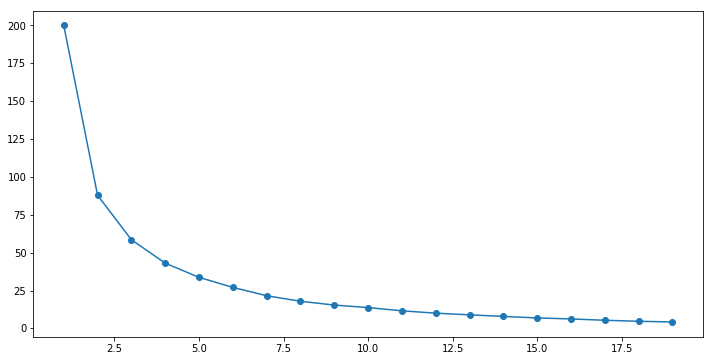

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(degrees_that_pay)

cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(X_scaled)
  cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Fit k means model and attach results to original data set

In [10]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

temp["predicted_means_clusters"] = y_kmeans
degrees_that_pay = temp

Split culsters into their own dataframes. How should we visualize results?

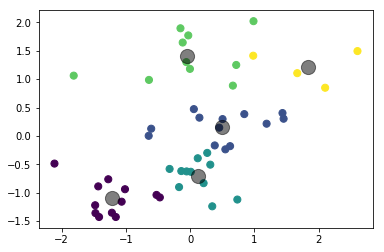

In [11]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Split Data by Cluster

In [18]:
culster_groups = degrees_that_pay.groupby("predicted_means_clusters")
cluster_one = culster_groups.get_group(0)
cluster_two = culster_groups.get_group(1)
cluster_three = culster_groups.get_group(2)
cluster_four = culster_groups.get_group(3)
cluster_five = culster_groups.get_group(4)

In [ ]:
## Results

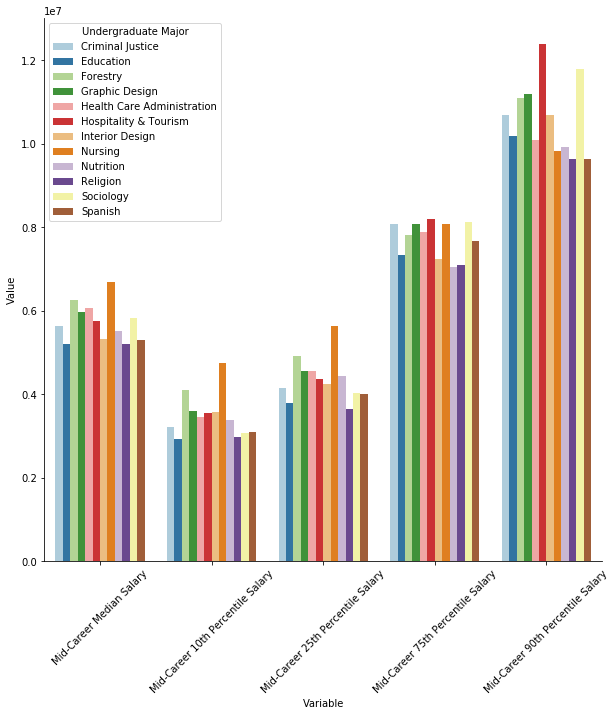

In [26]:
cluster_one = cluster_one[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
fig, ax1 = pl.subplots(figsize=(10, 10))
tidy = (
    cluster_one.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)


bar = sns.barplot(x='Variable', y='Value', hue='Undergraduate Major', data=tidy, ax=ax1, palette='Paired')
plt.setp(bar.get_xticklabels(), rotation=45)
sns.despine(fig)

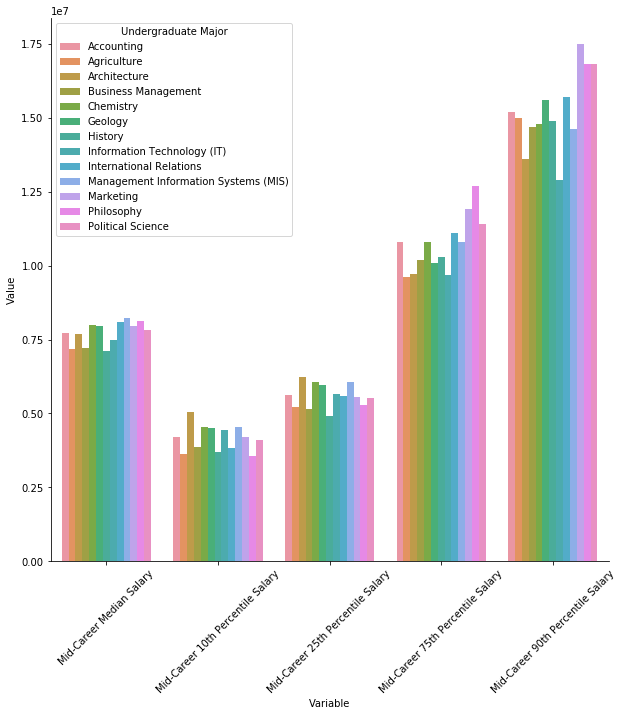

In [20]:
cluster_two = cluster_two[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
fig, ax1 = pl.subplots(figsize=(10, 10))
tidy = (
    cluster_two.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)


bar = sns.barplot(x='Variable', y='Value', hue='Undergraduate Major', data=tidy, ax=ax1, palette='Paired')
plt.setp(bar.get_xticklabels(), rotation=45)
sns.despine(fig)

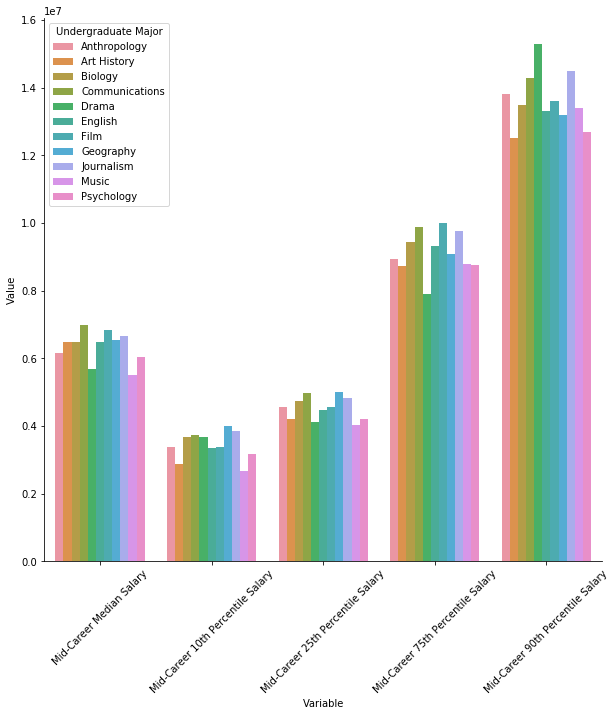

In [21]:
cluster_three = cluster_three[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
fig, ax1 = pl.subplots(figsize=(10, 10))
tidy = (
    cluster_three.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)


bar = sns.barplot(x='Variable', y='Value', hue='Undergraduate Major', data=tidy, ax=ax1, palette='Paired')
plt.setp(bar.get_xticklabels(), rotation=45)
sns.despine(fig)

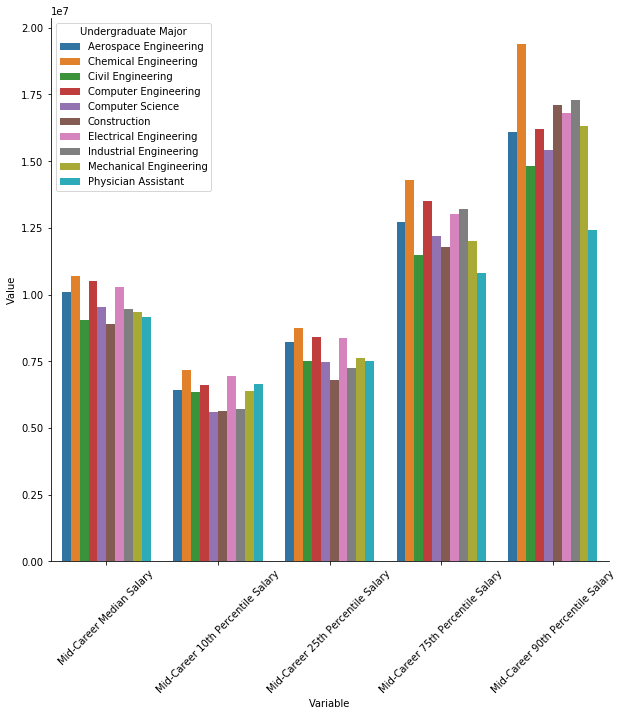

In [22]:
cluster_four = cluster_four[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
fig, ax1 = pl.subplots(figsize=(10, 10))
tidy = (
    cluster_four.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)


bar = sns.barplot(x='Variable', y='Value', hue='Undergraduate Major', data=tidy, ax=ax1, palette='Paired')
plt.setp(bar.get_xticklabels(), rotation=45)
sns.despine(fig)

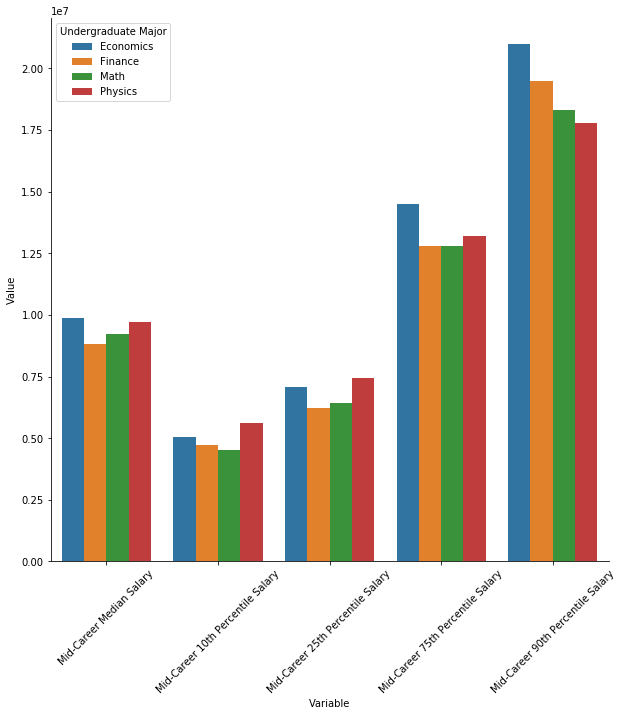

In [23]:
cluster_five = cluster_five[['Undergraduate Major', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]
fig, ax1 = pl.subplots(figsize=(10, 10))
tidy = (
    cluster_five.set_index('Undergraduate Major')
      .stack()
      .reset_index()
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)


bar = sns.barplot(x='Variable', y='Value', hue='Undergraduate Major', data=tidy, ax=ax1, palette='Paired')
plt.setp(bar.get_xticklabels(), rotation=45)
sns.despine(fig)